<a href="https://colab.research.google.com/github/mateustui/IA/blob/main/trab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.neural_network import MLPRegressor
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import num2date, date2num
import matplotlib.dates
import datetime
import os

In [8]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d caiquecassemiro/base-petr4
!unzip \*.zip && rm *.zip

  0% 0.00/56.2k [00:00<?, ?B/s]
100% 56.2k/56.2k [00:00<00:00, 18.9MB/s]
Archive:  base-petr4.zip
replace base_petr.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: base_petr.csv           


In [12]:
Path = "/content/"
ticker = 'PETR-4'

In [13]:
dataset = pd.read_csv('base_petr.csv', sep=',')

In [15]:
dataset = dataset[::-1]
dataset = dataset[dataset.columns[0:5]]
dataset = dataset.applymap(lambda x: x.replace(',', '.'))
print(dataset.head())

            data abertura fechamento maxima minima
5940  04/07/1994     0.56       0.58   0.59   0.56
5939  05/07/1994     0.57        0.6    0.6   0.56
5938  06/07/1994     0.61       0.66   0.66    0.6
5937  07/07/1994     0.68       0.69    0.7   0.68
5936  08/07/1994     0.68       0.72   0.73   0.67


In [16]:
def inclui_proximo_fechamento(dataset):
    # inclui a coluna proximo_fechamento pegando o fechamento da (data_atual+1)
    proximo_fechamento_temp = dataset['fechamento'].values
    proximo_fechamento = [x for x in proximo_fechamento_temp[1:]]
    proximo_fechamento.append('6000')
    dataset['proximo_fechamento'] = proximo_fechamento

    return dataset

dados = inclui_proximo_fechamento(dataset)
print(dados.head(10))

            data abertura fechamento maxima minima proximo_fechamento
5940  04/07/1994     0.56       0.58   0.59   0.56                0.6
5939  05/07/1994     0.57        0.6    0.6   0.56               0.66
5938  06/07/1994     0.61       0.66   0.66    0.6               0.69
5937  07/07/1994     0.68       0.69    0.7   0.68               0.72
5936  08/07/1994     0.68       0.72   0.73   0.67               0.72
5935  11/07/1994     0.74       0.72   0.75    0.7                0.7
5934  12/07/1994     0.74        0.7   0.75   0.69               0.69
5933  13/07/1994     0.71       0.69   0.72   0.68               0.73
5932  14/07/1994      0.7       0.73   0.74    0.7               0.74
5931  15/07/1994     0.75       0.74   0.76   0.73               0.72


In [17]:
#separando dados de treino e teste
Y = dados['proximo_fechamento']
Y = pd.to_numeric(Y)

X = dados.drop(['proximo_fechamento', 'data', 'abertura'], axis=1)
X = X.applymap(pd.to_numeric)

qtd = 5900
X_train = X[:qtd]
X_test = X[qtd:-1]
Y_train = Y[:qtd]
Y_test = Y[qtd:-1]
print('Tamanho Treino: {}\nTamanho Teste: {}'.format(len(X_train), len(X_test)))
print(X.head())

Tamanho Treino: 5900
Tamanho Teste: 40
      fechamento  maxima  minima
5940        0.58    0.59    0.56
5939        0.60    0.60    0.56
5938        0.66    0.66    0.60
5937        0.69    0.70    0.68
5936        0.72    0.73    0.67


In [31]:
#instanciando objeto
mlp = MLPRegressor(solver='adam', alpha=0.0001, hidden_layer_sizes=(10,10), random_state=1, 
                   learning_rate='constant', learning_rate_init=0.01, max_iter=1000, 
                   activation='logistic', momentum=0.9, verbose=False, tol=0.00001)

In [32]:
#treinando a rede
mlp.fit(X_train, Y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.01, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=1e-05, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [33]:
#predizendo os valores
saidas = mlp.predict(X_test)
saidas = [round(x, 2) for x in saidas]

In [34]:
taxa_de_acerto = round(mlp.score(X_test, Y_test), 2) * 100
print(f'{taxa_de_acerto}%')
print(f'{list(Y_test[:10].values)} (Valores reais)')
print(f'{saidas[:10]} (Valores obtidos através da rede neural)')

90.0%
[27.34, 25.91, 25.61, 25.01, 24.71, 23.27, 20.08, 19.8, 16.91, 19.3] (Valores reais)
[26.68, 27.29, 25.96, 25.59, 25.09, 24.71, 23.33, 20.01, 19.81, 17.01] (Valores obtidos através da rede neural)


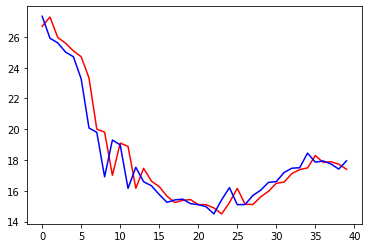

In [35]:
plt.plot(saidas, 'r', Y_test.values, 'b')
plt.show()